Task 2: 
        
        Stock Price Prediction Using LSTM for Tesla Stock Prices
        
Objective: To predict the future stock prices of Tesla using historical data, specifically focusing on the 'Close' prices.

Step 1 : 
          Data Loading

In [2]:
import pandas as pd
# Load the dataset
Tasla_Stock = pd.read_csv('E:\Rhombix Technologies Internship\RhombixTechnologies_Task2\dataset\Tasla_Stock_Updated_V2.csv')
# Display the first few rows of the dataset
Tasla_Stock.head()

<>:3: SyntaxWarning: invalid escape sequence '\R'
<>:3: SyntaxWarning: invalid escape sequence '\R'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7768\3505553697.py:3: SyntaxWarning: invalid escape sequence '\R'
  Tasla_Stock = pd.read_csv('E:\Rhombix Technologies Internship\RhombixTechnologies_Task2\dataset\Tasla_Stock_Updated_V2.csv')


,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2015-01-02,14.858000,14.883333,14.217333,14.620667,71466000
1,1,2015-01-05,14.303333,14.433333,13.810667,14.006000,80527500
2,2,2015-01-06,14.004000,14.280000,13.614000,14.085333,93928500
3,3,2015-01-07,14.223333,14.318667,13.985333,14.063333,44526000
4,4,2015-01-08,14.187333,14.253333,14.000667,14.041333,51637500


Step 2:
        Data Exploration and Preprocessing

In [3]:
# check for missing values and null values

print(Tasla_Stock.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2274 non-null   int64  
 1   Date        2274 non-null   object 
 2   Open        2274 non-null   float64
 3   High        2274 non-null   float64
 4   Low         2274 non-null   float64
 5   Close       2274 non-null   float64
 6   Volume      2274 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 124.5+ KB
None


In [4]:
# check null values
Tasla_Stock.isnull().sum()

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64

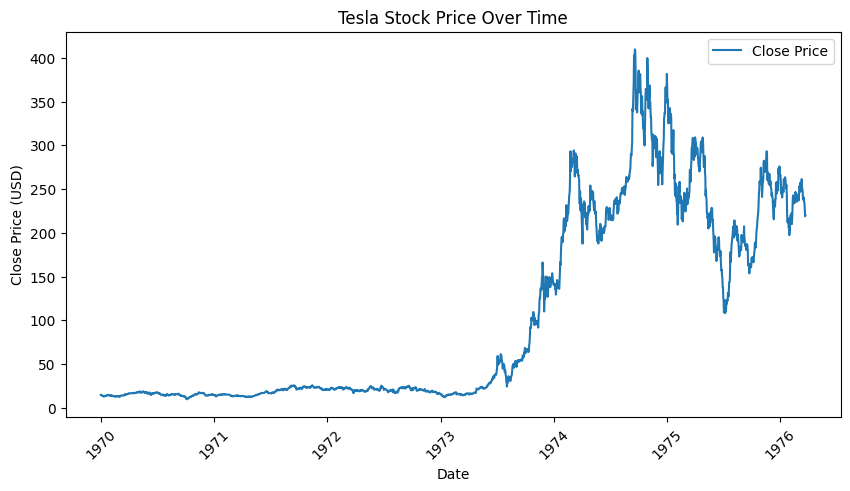

In [5]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(Tasla_Stock['Date'], Tasla_Stock['Close'], label='Close Price')
plt.title('Tesla Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

# Set major ticks format and limit the number of labels on the x-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Display labels for every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format as 'YYYY'

plt.xticks(rotation=45)
plt.legend()
plt.show()


Focus on 'Close' Prices: Since we're predicting future prices based on past performance, I will extract the 'Close' prices for further processing.

In [6]:
# Convert 'Date' to datetime
Tasla_Stock['Date'] = pd.to_datetime(Tasla_Stock['Date'])
Tasla_Stock['Date']

0      2015-01-02
1      2015-01-05
2      2015-01-06
3      2015-01-07
4      2015-01-08
          ...    
2269   2024-01-09
2270   2024-01-10
2271   2024-01-11
2272   2024-01-12
2273   2024-01-16
Name: Date, Length: 2274, dtype: datetime64[ns]

In [7]:
# Use only Close price for prediction

data_close = Tasla_Stock['Close'].values.reshape(-1,1)
data_close

array([[ 14.62066746],
       [ 14.00599957],
       [ 14.08533287],
       ...,
       [227.22000122],
       [218.88999939],
       [219.91000366]])

Step 3:
        Data Normalization: 
                                
                        Normalize the Data: Use MinMaxScaler to scale the 'Close' prices to a range of 0 to 1.

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(data_close)
# print scaled data
scaled_data

array([[0.01259433],
       [0.01105916],
       [0.0112573 ],
       ...,
       [0.5435723 ],
       [0.52276768],
       [0.5253152 ]])

Step 4:
Creating the time Series Data       
                                            
                             Prepare the Dataset: Create sequences of data (60 days) to predict the 61st day.

In [9]:
import numpy as np

def create_dataset(data,time_step=60):
    X,y = [],[]
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Create the time series dataset
X, y = create_dataset(scaled_data, time_step=60)

Step 5: Splitting the Data:

                         Train-Test Split: Divide the dataset into training (80%) and testing (20%) sets.

In [10]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


Step 6: Reshape the Data for LSTM:

                              Because LSTM model expects the data in 3D format[samples, time steps, features].

In [11]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

Step 7: Building the LSTM Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Initialize the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Step 8: Training the Model

Fit the Model: Train the model on the training dataset.

In [20]:
model.fit(X_train, y_train, batch_size=64, epochs=500)


Epoch 1/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 7.2282e-04
Epoch 2/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 7.0150e-04
Epoch 3/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 6.8861e-04
Epoch 4/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 7.1564e-04
Epoch 5/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - loss: 6.7679e-04
Epoch 6/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 6.9317e-04
Epoch 7/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 7.0663e-04
Epoch 8/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - loss: 6.1463e-04
Epoch 9/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 6.7661e-04
Epoch 10/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 8.8870e-04
Epoch 11/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - loss: 9.3369e-04
Epoch 12/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - loss: 8.3872e-04
Epoch 13/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 6.6385e-04
Epoch 14/500
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 8.1081e-04
E

Step 9: Making Predictions

In [21]:
predictions = model.predict(X_test)
predictions = scalar.inverse_transform(predictions)  # Reverse the scaling


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [22]:
# Reverse the scaling of the actual y_test for comparison
y_test_actual = scalar.inverse_transform(y_test.reshape(-1, 1))


Step 10: Evaluating the Model

Plot Actual vs. Predicted Prices: Visualize the model performanc

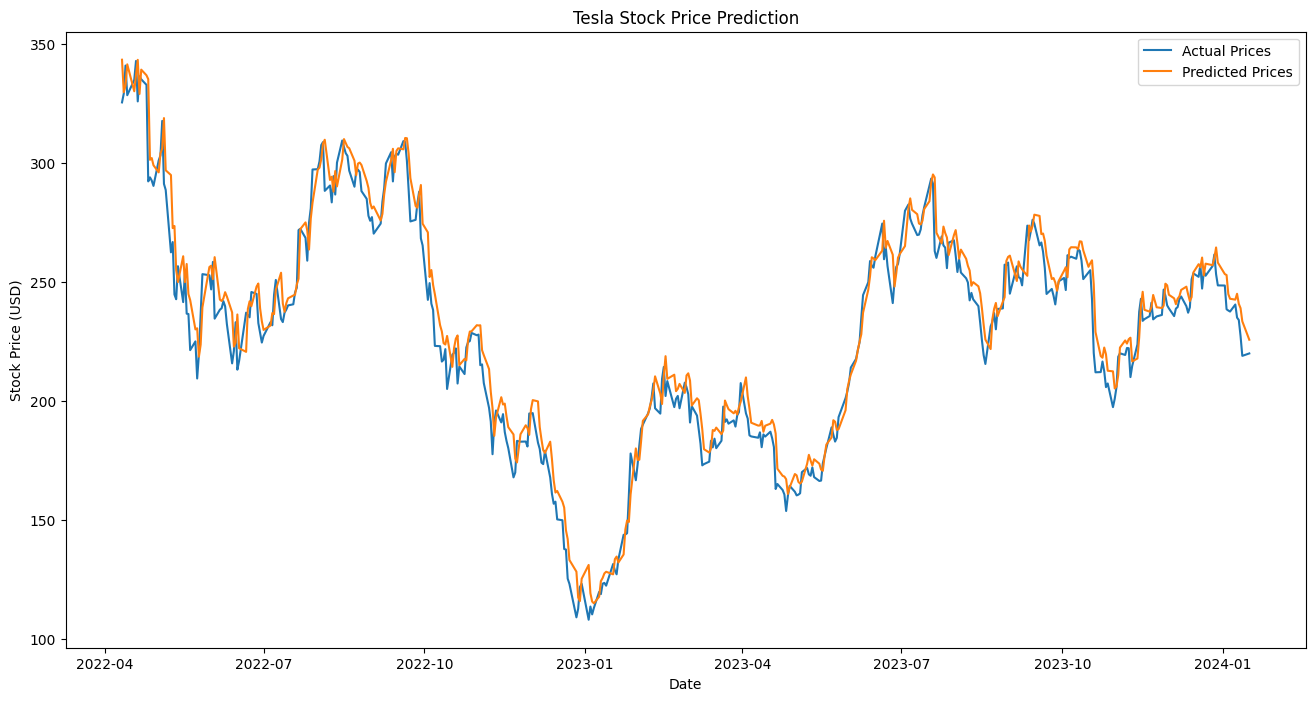

In [23]:
plt.figure(figsize=(16, 8))
plt.plot(Tasla_Stock['Date'][train_size + 60:], scalar.inverse_transform(scaled_data[train_size + 60:]), label='Actual Prices')
plt.plot(Tasla_Stock['Date'][train_size + 60:], predictions, label='Predicted Prices')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()


Step 11: Evaluation Metrics:

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
mae = mean_absolute_error(y_test_actual, predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


RMSE: 9.732596295485484
MAE: 7.52711381761538
